# Radar rainfall and sump level import and visualisation

In [12]:
#import the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# To be modified on a site by site basis

Change to the actural data from the site you want to study

Update the start_row accordingly (varies depending on the number of grid tiles in the query, check where your first for of actual date values is)

Update the radar rainfall start time (exactly as given in your .red file) the code then adds the new timestamps adding 5 minutes to the row above.

In [13]:


# Define the file paths (raw URLs)
sump_level_file = 'https://raw.githubusercontent.com/McGinty666/Rainfall-and-spill-analysis/main/West%20bexingfton%20sump%20level%20from%20Jan%202024.xlsx'
rainfall_file = 'https://raw.githubusercontent.com/McGinty666/Rainfall-and-spill-analysis/main/west%20bexington%20rainfall%20from%201-10-2023.xlsx'


# Define the starting row and start time for rainfall data
start_row = 21
rainfall_start_time = datetime.strptime("01/10/2023 00:00", "%d/%m/%Y %H:%M")




# Import and clean the rainfall and sump level data

Note the radar rainfall may have missing data, normally signposted with a 99 value but sometimes a larger number (like 2490?). It can be useful to print the maximum values and replace with a 0 if you are happy to ignore the missing rows.

A new column is created with a row wise mean rainfall intensity across all columns.

In [14]:


# Read the Excel file for sump level data
df_sump = pd.read_excel(sump_level_file, sheet_name='Sheet1', header=None, engine='openpyxl')
df_sump.columns = ["signal", "time", "level"]
df_sump["time"] = pd.to_datetime(df_sump["time"])

# Read the Excel file for rainfall data
df_rainfall = pd.read_excel(rainfall_file, sheet_name='Sheet1', skiprows=start_row-1, engine='openpyxl')
df_rainfall.replace(99, 0, inplace=True)
df_rainfall['mean rainfall'] = df_rainfall.mean(axis=1)
df_rainfall.insert(0, 'timestamp', [rainfall_start_time + timedelta(minutes=5*i) for i in range(len(df_rainfall))])



# Plotting the data

You should only need to modify the start and end time, the function won't need tweaking.

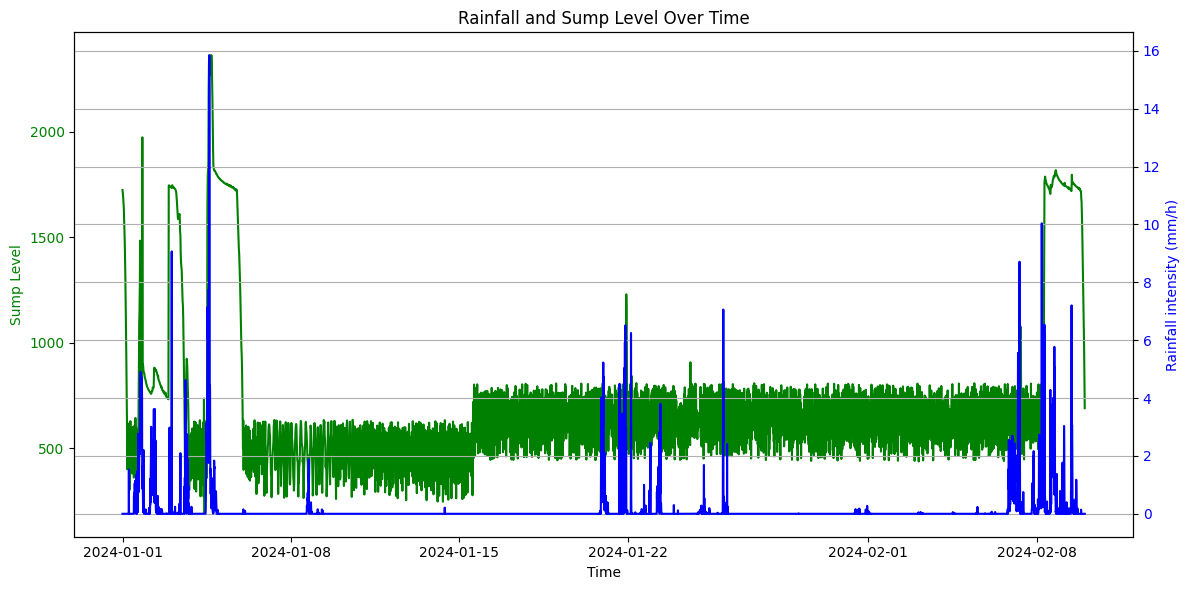

In [19]:
# Function to plot rainfall and sump level on separate y axes against time
def plot_rainfall_and_sump_level(start_time, end_time):
    # Convert start and end times to datetime
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)

    # Filter the dataframes based on the specified time interval
    df_sump_filtered = df_sump[(df_sump["time"] >= start_time) & (df_sump["time"] <= end_time)]
    df_rainfall_filtered = df_rainfall[(df_rainfall["timestamp"] >= start_time) & (df_rainfall["timestamp"] <= end_time)]

    # Create a figure and axis objects
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot sump level on the first y-axis
    ax1.plot(df_sump_filtered["time"], df_sump_filtered["level"], color='green', label='Sump Level')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Sump Level', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create a second y-axis for rainfall
    ax2 = ax1.twinx()
    ax2.plot(df_rainfall_filtered["timestamp"], df_rainfall_filtered["mean rainfall"], color='blue', label='Rainfall')
    ax2.set_ylabel('Rainfall intensity (mm/h)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add title and grid
    plt.title('Rainfall and Sump Level Over Time')
    fig.tight_layout()
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage with user-specified time interval
start_time = "2024-01-01 00:00:00"
end_time = "2024-02-10 00:00:00"
plot_rainfall_and_sump_level(start_time, end_time)